In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
from scipy import stats
import pandas as pd


In [2]:
tips = sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


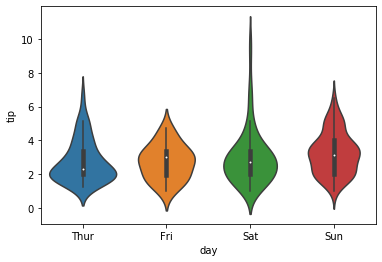

In [3]:
sns.violinplot(x='day',y='tip', data=tips)

In [5]:
y = tips['tip'].values
idx = pd.Categorical(tips['day']).codes

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
set(idx)

{0, 1, 2, 3}

In [12]:
with pm.Model() as comparing_groups:
    means = pm.Normal('means', mu=0, sd=10, shape=len(set(idx)))
    sds = pm.HalfNormal('sds', sd=10, shape=len(set(idx)))

    y = pm.Normal('y', mu=means[idx], sd =sds[idx], observed=y)
    trace_cg =pm.sample(5000)

INFO (theano.gof.compilelock): Waiting for existing lock by process '7517' (I am process '6619')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/ma/.theano/compiledir_Linux-5.4--generic-x86_64-with-debian-bullseye-sid-x86_64-3.7.6-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '7517' (I am process '6619')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/ma/.theano/compiledir_Linux-5.4--generic-x86_64-with-debian-bullseye-sid-x86_64-3.7.6-64/lock_dir
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sds, means]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 7 seconds.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbae492df90>,
      dtype=object)

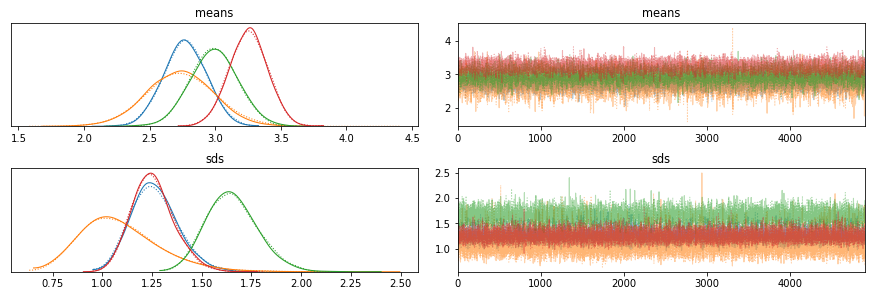

In [13]:
chain_cg = trace_cg[100::]
pm.traceplot(chain_cg)

In [14]:
pm.summary(chain_cg)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
means[0],2.771,0.162,2.473,3.080,0.001,0.001,12369.0,12369.0,12390.0,7783.0,1.0
means[1],2.734,0.252,2.273,3.219,0.002,0.002,11127.0,11127.0,11290.0,7108.0,1.0
means[2],2.991,0.177,2.658,3.319,0.002,0.001,12465.0,12428.0,12510.0,8112.0,1.0
means[3],3.253,0.144,2.984,3.520,0.001,0.001,11264.0,11232.0,11309.0,8186.0,1.0
sds[0],1.265,0.117,1.062,1.494,0.001,0.001,10228.0,9947.0,10581.0,8006.0,1.0
sds[1],1.095,0.196,0.758,1.459,0.002,0.001,9280.0,8569.0,10301.0,7533.0,1.0
sds[2],1.653,0.126,1.422,1.890,0.001,0.001,14592.0,14077.0,15074.0,8199.0,1.0
sds[3],1.256,0.104,1.067,1.453,0.001,0.001,12801.0,12422.0,13221.0,8286.0,1.0


In [17]:
comparisons = [(i,j) for i in range(4) for j in range(i+4,4)]


In [18]:
comparisons

[]